# Spotify Genres: Classifying Genre by Audio Features and Lyrics

 - Author: Sean Reidy 
 - UMBC DATA 601 Final Project
 - Dec 2020

![spotifyLogo](../media/spotifylogo.png)
![geniusLogo](../media/genius.png)

## Table Of Contents 

 1. [Introduction & Project Overview](#intro)
   1. [Background](#Background)
   2. [Objective & Reserch Questions](#objective)
   3. [Similar Work](#similar)
   4. [Packages & Libraries](#packages)
 2. [Data Collection](#data)
   1. [Data Sources](#datasources)
   2. [Data Collection Process](#datacollection)
   3. [Data Overview](#dataOverview)
   4. [Data Features](#features)
 3. [Exploratory Data Analysis](#eda)
 4. [Data Preparation](#dataprep) 
 5. [Modeling](#modeling)
   1. [Logistic Regression](#lm)
   2. [Decision Tree](#tree)
   3. [Random Forests](#rndfor)
 6. [Fine-Tuning](#finetune)
 7. [Final Model & Conclusion](#final) 
 8. [Limitations & Future Work](#futurework)
 9. [References](#ref)


# Introduction & Project Overview 
<a id = "intro"></a>

### Background 
<a id = "Background"></a>
If you're a Spotify user like myself, I’m almost certain you were fascinated by your recent spotify wrapped for 2020. Spotify’s yearly summary of your musical adventures on the platform, serving as an “best of” montage of your music. 
 
![headImg](../media/spotifywrapped.png)

This year in particular given the circumstances of our new lives, many user's musical habits and even tastes have shifted and changed. Music is deeply personal and varied, as this year has made some of us branch out into new genres, and others look back at comfort songs from our youth. There is reason to suspect that these changes in taste is a response to stress and environmental factors. [More info on shifting tastes in music during the pandemic](https://www.vice.com/en/article/m7j8gq/pandemic-changing-music-taste-nostalgia) 

This year my personal spotify wrapped showed I gravitated towards lyrically dense artists, such as the indie folk band The Mountain Goats, and music with a slower pace and more melancholy tone. This personal shift in music habits got me thinking about what makes a genre of music feel the way it does, is it the tone of the music or is it the lyrical content. Expanding upon previous work with the Spotify API I hoped to explore the idea of classifying tracks based on both audio features, and lyrics in hopes to gain a better understanding of what makes a genre unique. This is where the lyrics annotation service Genius comes into play, by using both the Spotify Web API to find the songs, and the Genius API to query lyrics I could greatly improve results of a genre classification model with the addition of more features. 

### Objective & Reserch Questions
<a id = "objective"></a>

It is obvious to most individuals what a musical genre sounds like, it's quite easy to say one song is rock and another is rap after only to listing for a few seconds. What’s difficult is asking why? Why is song X rock and not rap?  What natural heuristics did we use in our heads to make this decision? For Music, and other creative media,  there are no predefined rules for classifying a track or artists with a genre. With this project I hope to define genre in more quantitative factors,  such as a song's popularity, the key, and other audio features. 

 - What characteristics objectivly define a music genre? 
  - Is it possible to classify traks into a genre from audio feautres and lyric data? 
  - Are some genres more diverse than others? And how so,  is the genre creatively contraited by the trappings of the genre? 
 - What is better at defining genre, is it the audio features (such as tone, valance, or danceability) or is the lyrical content of a song more effective for a classification model?
 - Does incorpering NLP features on lyrical content help improve classification of genre? 
 - How does lyrical sentiment, and profanity differ across genre? 
 - Does there exist a relationship between the Valence (musical tone of a song: happy or sad) and Lyrics Sentiment (are the lyrics themselves happy or sad)? 
 - Using our understanding of genre from our models is it possible to generate music and lyrics of a given genre?

Looking at the technical and programming aspects of this project.  I wanted to learn and implement parallel processing for the data collection process. Earlier in this project I had realized that the volume of data I would need to pull from the Spotify API would be much greater than my past work. Pulling tracks one at a time would not be practical, so I wanted to learn how to parallelize this process with Pythons Concurrent Futures package. 


### Similar Work
<a id = "similar"></a>
- The inspiration for this project came from another tool that used the spotify web API. [Every Noise](http://everynoise.com/) is an ongoing project that is logging and visualizing the spotify genre space. As of November 2020 there are 5,068 unique genres within the Spotify track library, and the number is always growing. The tool provides a wonderfully exciting way to explore both mainstream and fringe genres and builds a playlist for each and every genre it logs.  [This Link](https://open.spotify.com/playlist/69fEt9DN5r4JQATi52sRtq?si=_xSevsMHTh6QEOnPmQdAGw) will take you to a playlist generate by the Every Noise Project, where every genre has one song; over 350 hours of music.

- This project uses lyric data from songs pulled from the genius api and then maps the number of references to locations https://ashleygingeleski.com/tag/song-lyrics/

- https://www.kaylinpavlik.com/classifying-songs-genres/ A simmilar project written in R, I got the idea for root and sub genre lists from here for searching the Spotify API




### Packages & Libraries
<a id = "packages"></a>

The following Python packages were used in this project for either data colection or modleing 

- Packages Used: 
	+ [Spotipy](https://spotipy.readthedocs.io/en/latest/#): A Python library for the [Spotify Web API](https://developer.spotify.com/documentation/web-api/)
    + [lyricsgenius](https://pypi.org/project/lyricsgenius/) : A Python wrapper for the [Genius Web API](https://genius.com/developers)
	+ [getpass](https://pymotw.com/2/getpass/#module-getpass): A Python library to hide spotify web API credentials 
	+ [pickel](https://docs.python.org/3/library/pickle.html): used to save the spotify dataframe to disk
	+ [pandas](https://pandas.pydata.org/docs/)
	+ [matplotlib](https://matplotlib.org/3.3.3/contents.html)
	+ [seaborn](https://seaborn.pydata.org/)
	+ [scikit-learn](https://scikit-learn.org/stable/)
    + [re](https://docs.python.org/3/library/re.html) Regular expression operations 
    + [nltk](https://www.nltk.org/) Python Natural Language Toolkit 
    + [wordcloud](https://amueller.github.io/word_cloud/index.html) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pickle

# Data Collection
<a id = "data"></a>
#### Please Note:
##### All functions and code used for collecting the data can be found in the notebook GettingData.ipynb
##### The Data CSV and PKL files exceed the GitHub file size limit and can be downloaded from Google Drive [here](https://drive.google.com/drive/folders/1VDrB8YQwvpXE2hfbGoMrfkSLLyBG92R3?usp=sharing) 

 - Data Collected On: 12/5/2020


### Data Sources 
<a id="datasources"></a>
Data for this project comes from two different sources. The Spotify Web Api and the Genius Api 
 - [Spotify Web API](https://developer.spotify.com/documentation/web-api/) 
  - A popular music streaming service that has a public web API
   - We will need the following:
     + [A spotify Account](https://developer.spotify.com/)
     + Create an App in the [Spotify Developer Dashboard](https://developer.spotify.com/dashboard/applications) 
     + Within the newly create Spotify App
         + Spotify Client ID 
         + Spotify Client Secret 
 - [Genius Web API](https://genius.com/developers)
  - Originally known as Rap Genius, Genius is a website that catalogs song lyrics and allows users to annotate and add interpretations of those lyrics.
   - We will need the following:
     + [A Genius Account](https://genius.com/developers)
     + Create an App in the [Genius Developer Dashboard](https://genius.com/api-clients) 
         + You will have to set an Api URL. (I used this github project) 
     + Within the newly create Spotify App
         + Click Get Access Token 
            + Genius Client Access Token


### Data Collection Process
<a id ="datacollection"></a>

![datacollection](../media/spotifydatadiagram.png)

Illustrated in the image above is the process used to collect the data from both the Spotify Web API and the Genius API. Two different Python API wrappers were used to interact with the API’s, [Spotipy](https://spotipy.readthedocs.io/en/2.16.1/) and [lyricsgenius](https://pypi.org/project/lyricsgenius/) 

 There is a total of 6 root genres, each root genre has 5 of the most popular sub_genres, These genres were selected using the [Every Noise Project](http://everynoise.com/) By looking at the top most popular genres across all of Spotify, then selecting the associated sub genres. 
 - Pop
   - post teen pop, dance pop, electropop, pop dance, indie pop
 - Rap
   - hip hop. souther hip hop, gangster rap, trap, dirty south rap
 - EDM 
   - electro house, big room, pop edm, pop dance, complextro
 - R&B
   - urban contemporary, new jack swing, neo soul, hip pop,pop r&b
 - Country
   - Country road, contemporary county, moden country rock, country rock, country dawn
 - Rock
    - album rock, classic rock, permanet wave, hard rock, modern rock

The defined genres were used to generate a list of spotify playlist id’s, by searching for 30 total playlists per genre. Then this list was processed, extracting Spotify Audio Feature Data, for every track, into a dataframe. Then for every track found in the data frame, lyrics were queried from the Genius API.  

The first major hurdle I ran into with this project was the time it took to pull data from both the Spotify API and the Genius API sequentially was so great that it would take almost a full day or more of continuous API calls to pull all the data.  To speed up the process, I decided to parallelize the process, splitting the workload across multiple CPU cores. 

All functions and data collection can be found in the notebook GettingData.ipynb

Next we dropped any tracks with missing data, like missing lyrics. And through our EDA we found that there were concerdable outliers in track duration, and these were removed from the dataset. 


### Data Overview 
<a id="dataOverview"></a>


#### Import The Data From File

In [3]:
# Read in Dataset from file
spotify_df = pd.read_pickle("spotify_df_feature.pkl")

In [4]:
spotify_df.head()

,track_id,artist,artist_id,album,trackName,root genre,sub genre,acousticness,danceability,duration_ms,...,lyrics_vector,pos_tagging,nouns,verbs,adverbs,adjectives,foreign_count,profanity_count,lyrics_lemm,lyrics_sentiment
0,26auE2wH2FdGQWZf8aQ7G4,Halsey,26VFTg2z8YR0cCuwLzESi2,BADLANDS (Live From Webster Hall),Castle,pop,post-teen pop,0.252,0.627,277623,...,"[sick, of, all, these, people, talking,, sick,...","[(sick, NN), (of, IN), (all, PDT), (these, DT)...",76,90,36,38,2,0,"[sick, people, talking,, sick, noise, tired, c...",-0.054804
1,4k0yY041y3wLd41uDjqROv,Halsey,26VFTg2z8YR0cCuwLzESi2,BADLANDS (Live From Webster Hall),Gasoline,pop,post-teen pop,0.223,0.731,199593,...,"[are, you, insane, like, me?, been, in, pain, ...","[(are, VBP), (you, PRP), (insane, VBP), (like,...",68,59,13,31,0,2,"[insane, me?, pain, me?, bought, hundred, doll...",0.071368
2,2qxmye6gAegTMjLKEBoR3d,Alec Benjamin,5IH6FPUwQTxPSXurCrcIov,Narrated For You,Let Me Down Slowly,pop,post-teen pop,0.740,0.652,169354,...,"[this, night, is, cold, in, the, kingdom, can,...","[(this, DT), (night, NN), (is, VBZ), (cold, VB...",45,98,48,35,0,0,"[night, cold, kingdom, feel, fade, away, kitch...",0.016065
3,2nMeu6UenVvwUktBCpLMK9,Lana Del Rey,00FQb4jTyendYWaN8pK0wa,Young And Beautiful,Young And Beautiful,pop,post-teen pop,0.262,0.324,236053,...,"[i've, seen, the, world,, done, it, all, had, ...","[(i've, NN), (seen, VBN), (the, DT), (world,, ...",47,63,30,23,0,0,"[i've, seen, world,, done, cake, diamonds,, br...",0.267195
4,7i9AEaOWJrfVBsinUSefma,Melanie Martinez,63yrD80RY3RNEM2YDpUpO8,K-12,Detention,pop,post-teen pop,0.488,0.832,236973,...,"[i'm, not, bad, guy, so, don’t, treat, me, bad...","[(i'm, NN), (not, RB), (bad, JJ), (guy, NN), (...",86,87,14,33,0,1,"[i'm, bad, guy, don’t, treat, bad, i'm, feelin...",-0.118403


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22493 entries, 0 to 26560
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            22493 non-null  object 
 1   artist              22493 non-null  object 
 2   artist_id           22493 non-null  object 
 3   album               22493 non-null  object 
 4   trackName           22493 non-null  object 
 5   root genre          22493 non-null  object 
 6   sub genre           22493 non-null  object 
 7   acousticness        22493 non-null  float64
 8   danceability        22493 non-null  float64
 9   duration_ms         22493 non-null  int64  
 10  energy              22493 non-null  float64
 11  instrumentalness    22493 non-null  float64
 12  key                 22493 non-null  int64  
 13  liveness            22493 non-null  float64
 14  loudness            22493 non-null  float64
 15  mode                22493 non-null  int64  
 16  spee

### Data Features 
<a id="features"></a>

##### Features from Spotify API
- track_id : a spotify primary key; unique for each track
- artist: name of artist
- album: name of album
- trackName: title of track
- root genre: (TARGET VAR) the root genre of the track, pop, rap, edm, R&B, Country, Rock
- sub genre: The associated sub genre of the track 
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
- duration_ms: The duration of the track in milliseconds.
- energy: a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. 
- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.
- key: The estimated overall key of the track. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class) 
- liveness: Detects the presence of an audience in the recording.
- loudness: The overall loudness of a track in decibels (dB). 
- mode: indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness: Speechiness detects the presence of spoken words in a track.
- tempo: BPM of track
- time_signature: An estimated overall time signature of a track. 
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
- category_id: The Spotify Category ID of the track 
- popularity: The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

##### Features from the Genius API
- lyrics: A large string of song raw lyrics from the genius API

##### Engineered Features 
- lyrics_vector: lyrics, cleaned of new line chars and vectorized into a list 
- pos_tagging:  a list of tuples generated from nltk.pos_tag, Part of Speach 
- nouns: A total count of nouns in a track 
- verbs: a total count of verbs in a track
- adverbs: a total count of adverbs in a track 
- adjectives: a total count of adjectives in a track
- foreign_count: a total count of foreign(non english) words in a track 
- profanity_count: a total count of profanity in a track 
- lyrics_lemm: lyrics vectors that have been stemmed and lemmitized 
- lyrics_sentiment: The mean sentiment from nltk.sentiment.vader across all lines in the track lyrics. negative values is more sad,mean and postive values happy and upbeat. 




# Exploratory Data Analysis
<a id = "eda"></a>

### Missing Values & Outliers 
We first looked at the data for any missing values. During the data collection process, not every track had lyrics found, so these tracks were dropped from the data set.  Next we checked for outliers, by looking at the distributions of the continuous variables, the biggest takeaway was that there were many songs with durations up in the 50000 millisecond range, well out of the IQR. So these values were also dropped from the dataset.  Before any cleaning, there were a total of  26561 tracks, we removed 4068 tracks, resulting in a dataset with a total of 22493 tracks. 

Code for this process can be found in FeatureEngineering.ipynb


### Spotify Feature Data

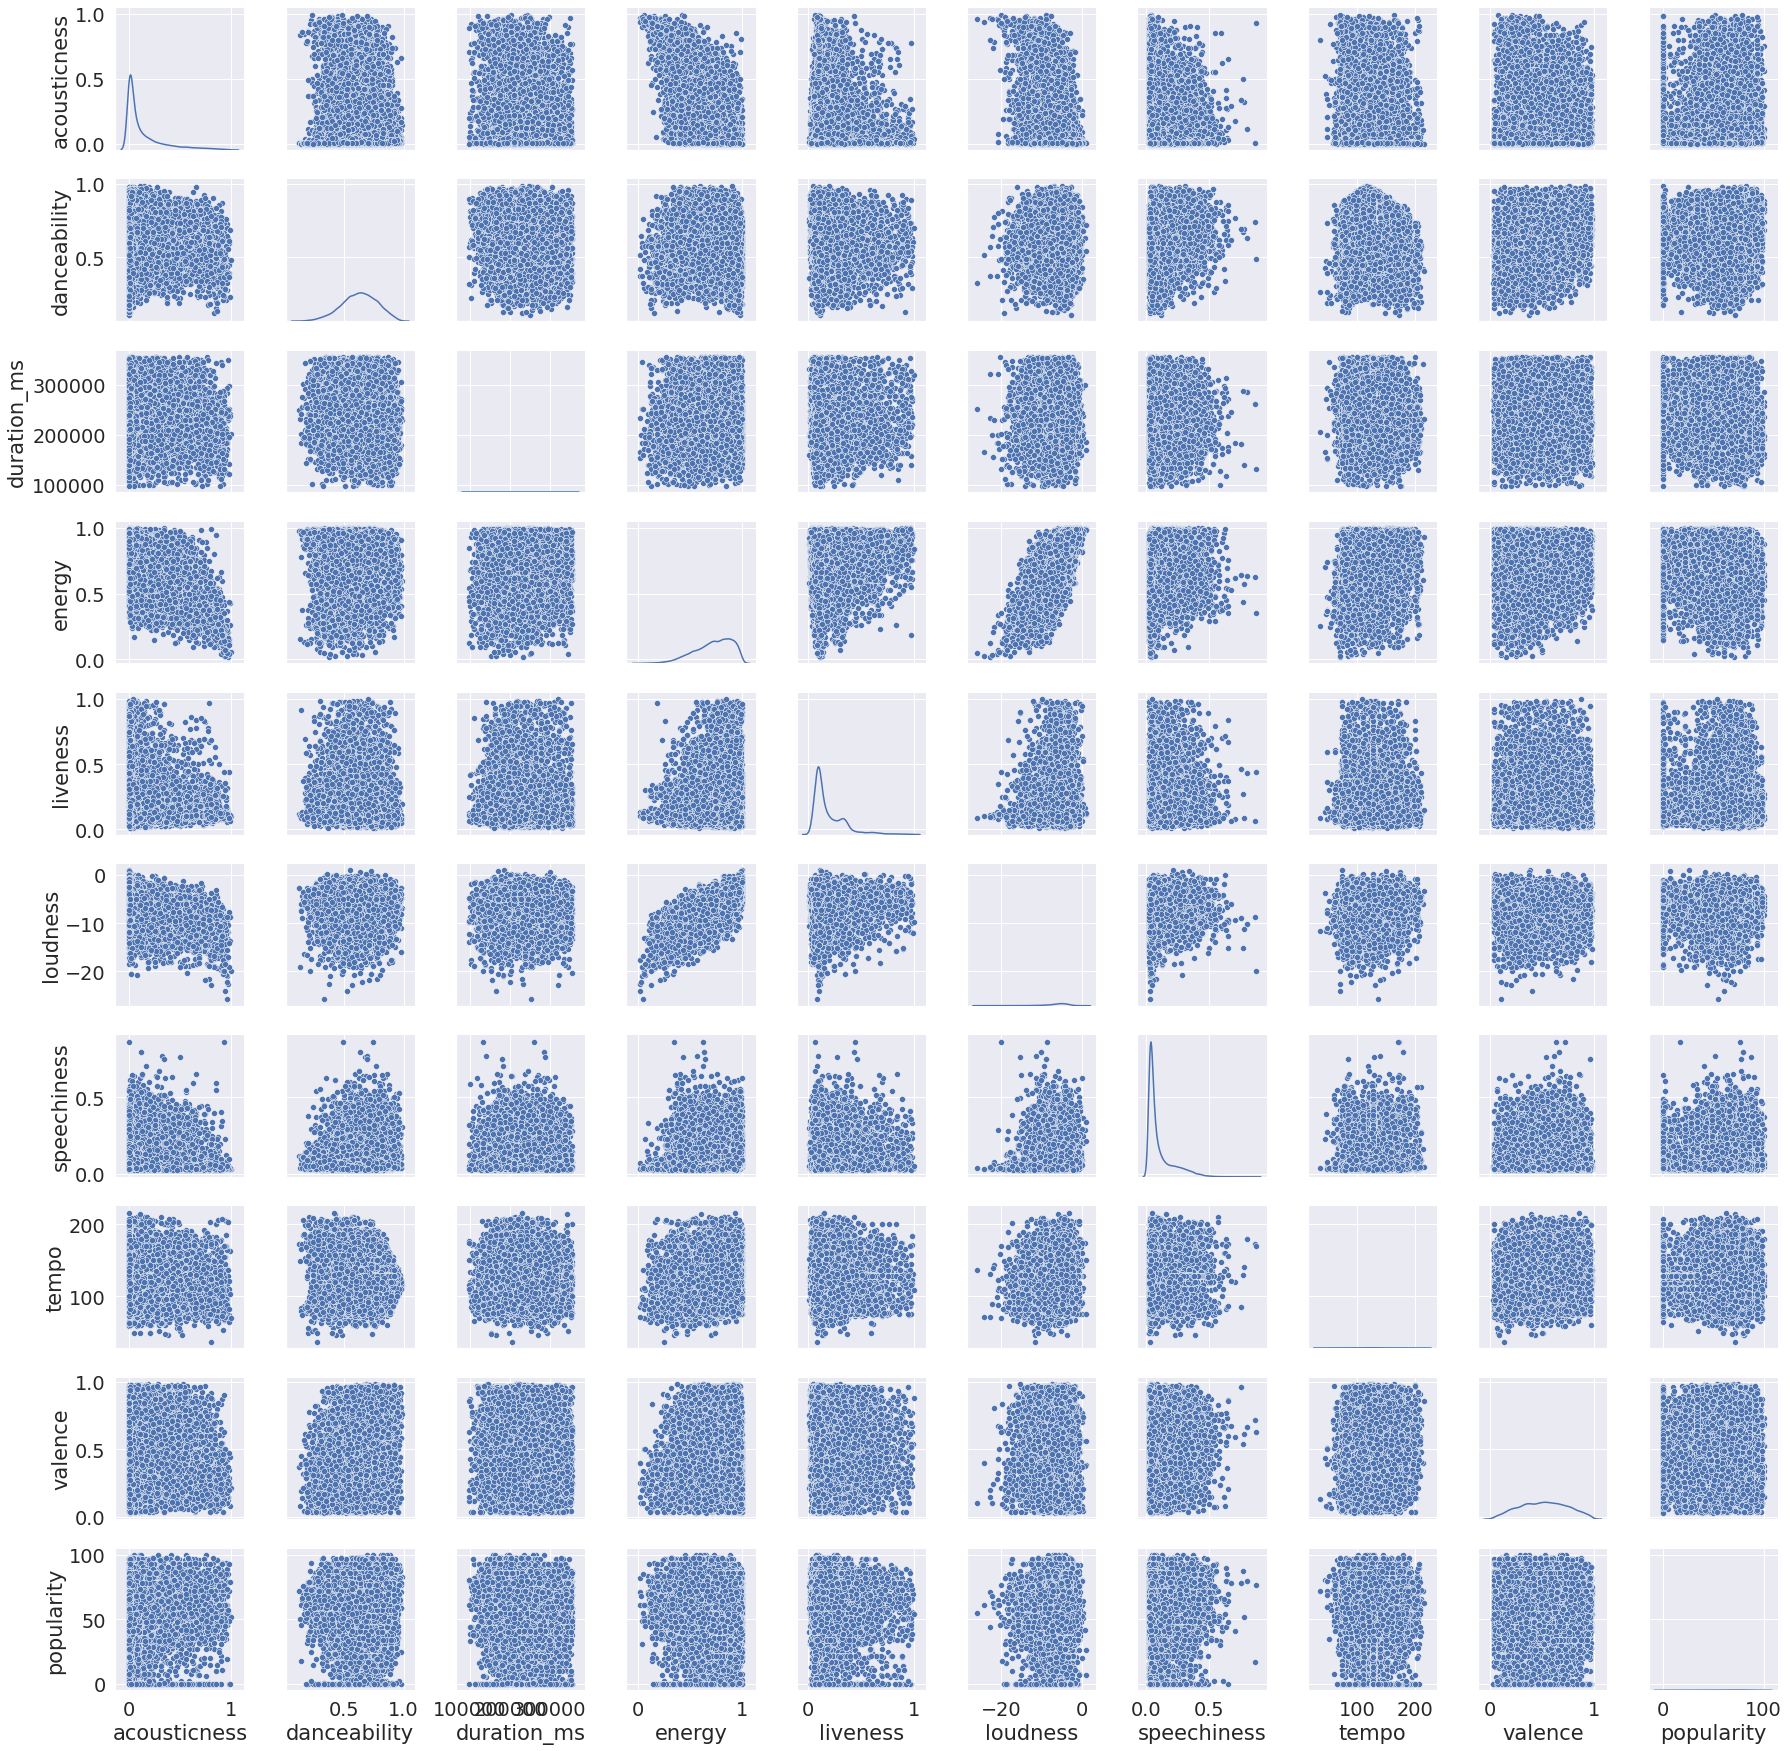

In [6]:
continuious_vars = ['acousticness', 'danceability','duration_ms', 'energy','liveness','loudness','speechiness','tempo','valence','popularity']
sns.set(font_scale = 1.75)
continuious_vars_pairs_plot = sns.PairGrid(spotify_df, vars = continuious_vars)
continuious_vars_pairs_plot.map_diag(sns.kdeplot)
continuious_vars_pairs_plot.map_offdiag(sns.scatterplot)

Text(0.5, 1.0, 'Spotify Audio Features Correlation Matrix')

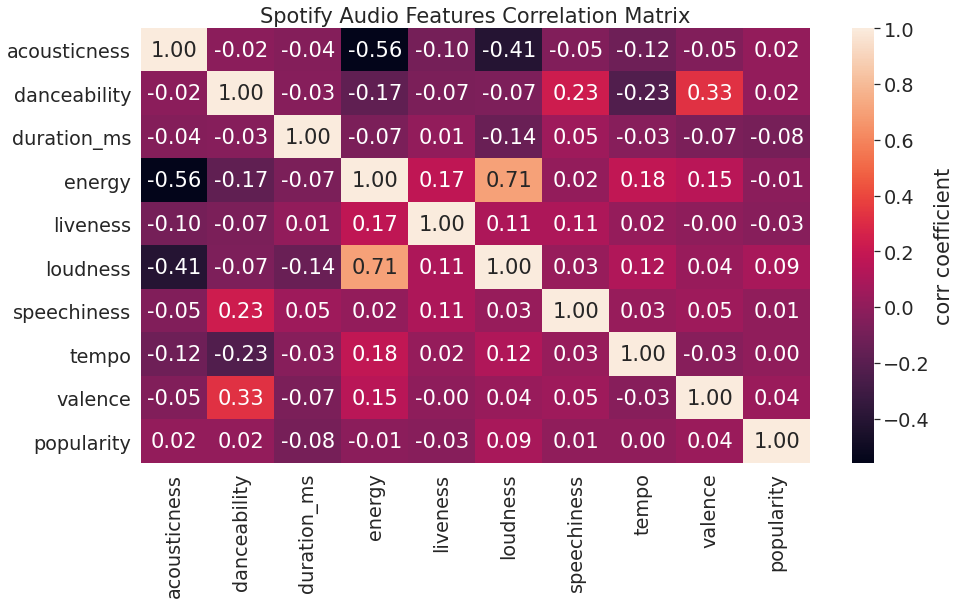

In [7]:
plt.figure(figsize=(15,8))
ax =sns.heatmap(spotify_df[continuious_vars].corr(),annot=True, fmt=".2f", cbar_kws={'label': 'corr coefficient'})
ax.set_title("Spotify Audio Features Correlation Matrix")


##### Key Observations 
 - Loudness and Energy have the highest positive correlation (0.71) across all songs, In Feature engineering we should look into removing one as they may be redundant. This is shown in more detail in the scatter plot below. 
 - It makes intuitive sense that energy and acoustincess are negatively related (-0.56) as acoustic songs tend to be very mellow and chill in tone,
 - There is also a positive relationship between valence(the happiness of a song) and its danceability, so happier songs are more danceable
 - There does not appear to be much interaction with popularity, This could be an important feature for models.

#### Energy vs Loudness

Text(0, 0.5, 'Loudness')

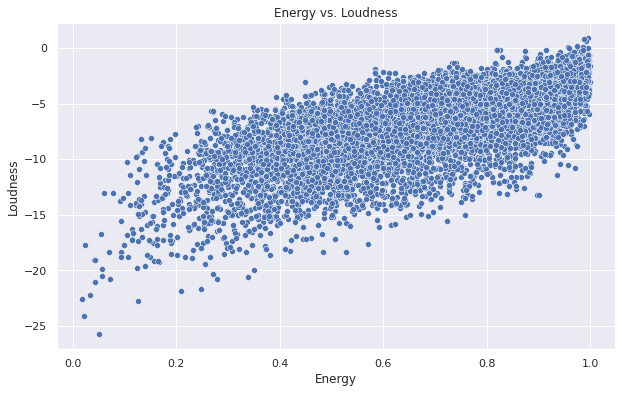

In [112]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=spotify_df, x = "energy", y = "loudness")
ax.set_title("Energy vs. Loudness")
ax.set_xlabel("Energy")
ax.set_ylabel("Loudness")

### Lyrics Data

Text(0.5, 1.0, 'LLyrics Features Correlation Matrix')

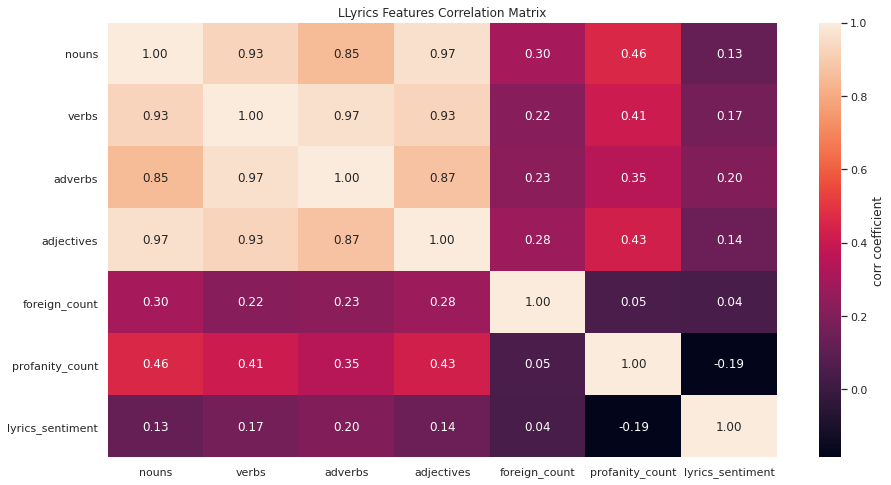

In [11]:
continuious_vars = ['nouns','verbs','adverbs','adjectives','foreign_count','profanity_count', 'lyrics_sentiment']
plt.figure(figsize=(15,8))
ax =sns.heatmap(spotify_df[continuious_vars].corr(),annot=True, fmt=".2f", cbar_kws={'label': 'corr coefficient'})
ax.set_title("LLyrics Features Correlation Matrix")

##### Key Observations 
 - The Part of Speech counts , nouns, verbs, etc, do not have too much interaction with other variables to be useful in classification. 

### Valence Vs Lyrics Sentiment 

Does there exist a relationship between the Valence (musical tone of a song, happy sad) and Lyrics Sentiment ( are the lyrics themselves happy or sad)? This is a question that has interested me personally as I have always found artists that experiment with this dichotomy of lyrics mismating the tone of a song fascinating.



In [42]:
#scale valence from -1 to 1 to fit lyrics_sentiment 
from sklearn import preprocessing
temp_df = spotify_df[['valence','lyrics_sentiment']]
x = temp_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
temp_df = pd.DataFrame(x_scaled)
temp_df.rename(columns={0:'valence',1:'lyrics_sentiment'})

,valence,lyrics_sentiment
0,0.138997,0.472071
1,0.302399,0.535274
2,0.474180,0.507571
3,0.126427,0.633369
4,0.788415,0.440213
...,...,...
22488,0.956007,0.534673
22489,0.091861,0.510743
22490,0.633393,0.492391
22491,0.256311,0.516071


Text(0, 0.5, 'Lyrics Sentiment')

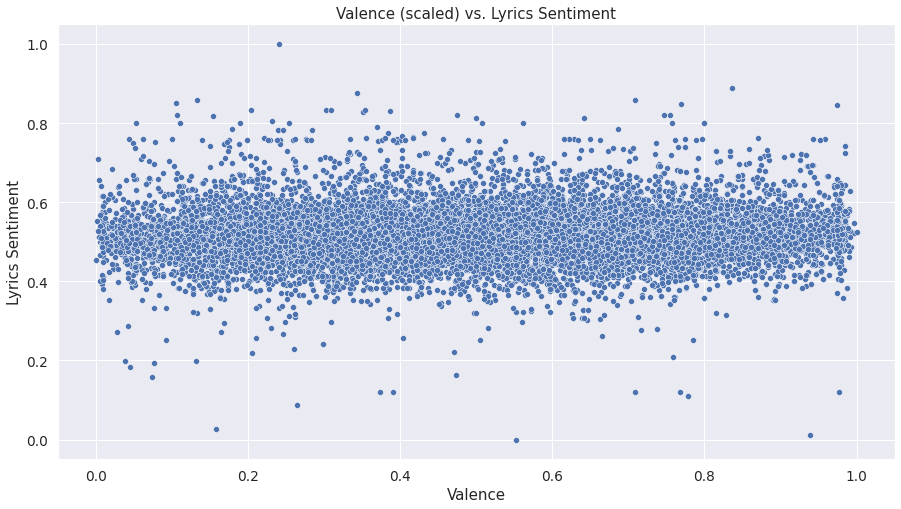

In [54]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x =temp_df[::1][0], y =temp_df[::1][1])
ax.set_title("Valence (scaled) vs. Lyrics Sentiment")
ax.set_xlabel("Valence")
ax.set_ylabel("Lyrics Sentiment")

There does not seem to be a correlation between the musical valence of a track and the lyrics Sentiment. 

### Features Grouped By Genre 

Looking at how the variables compare across the different root genre targets, will provide a better understanding of what features are most useful for including in any classifier models. 

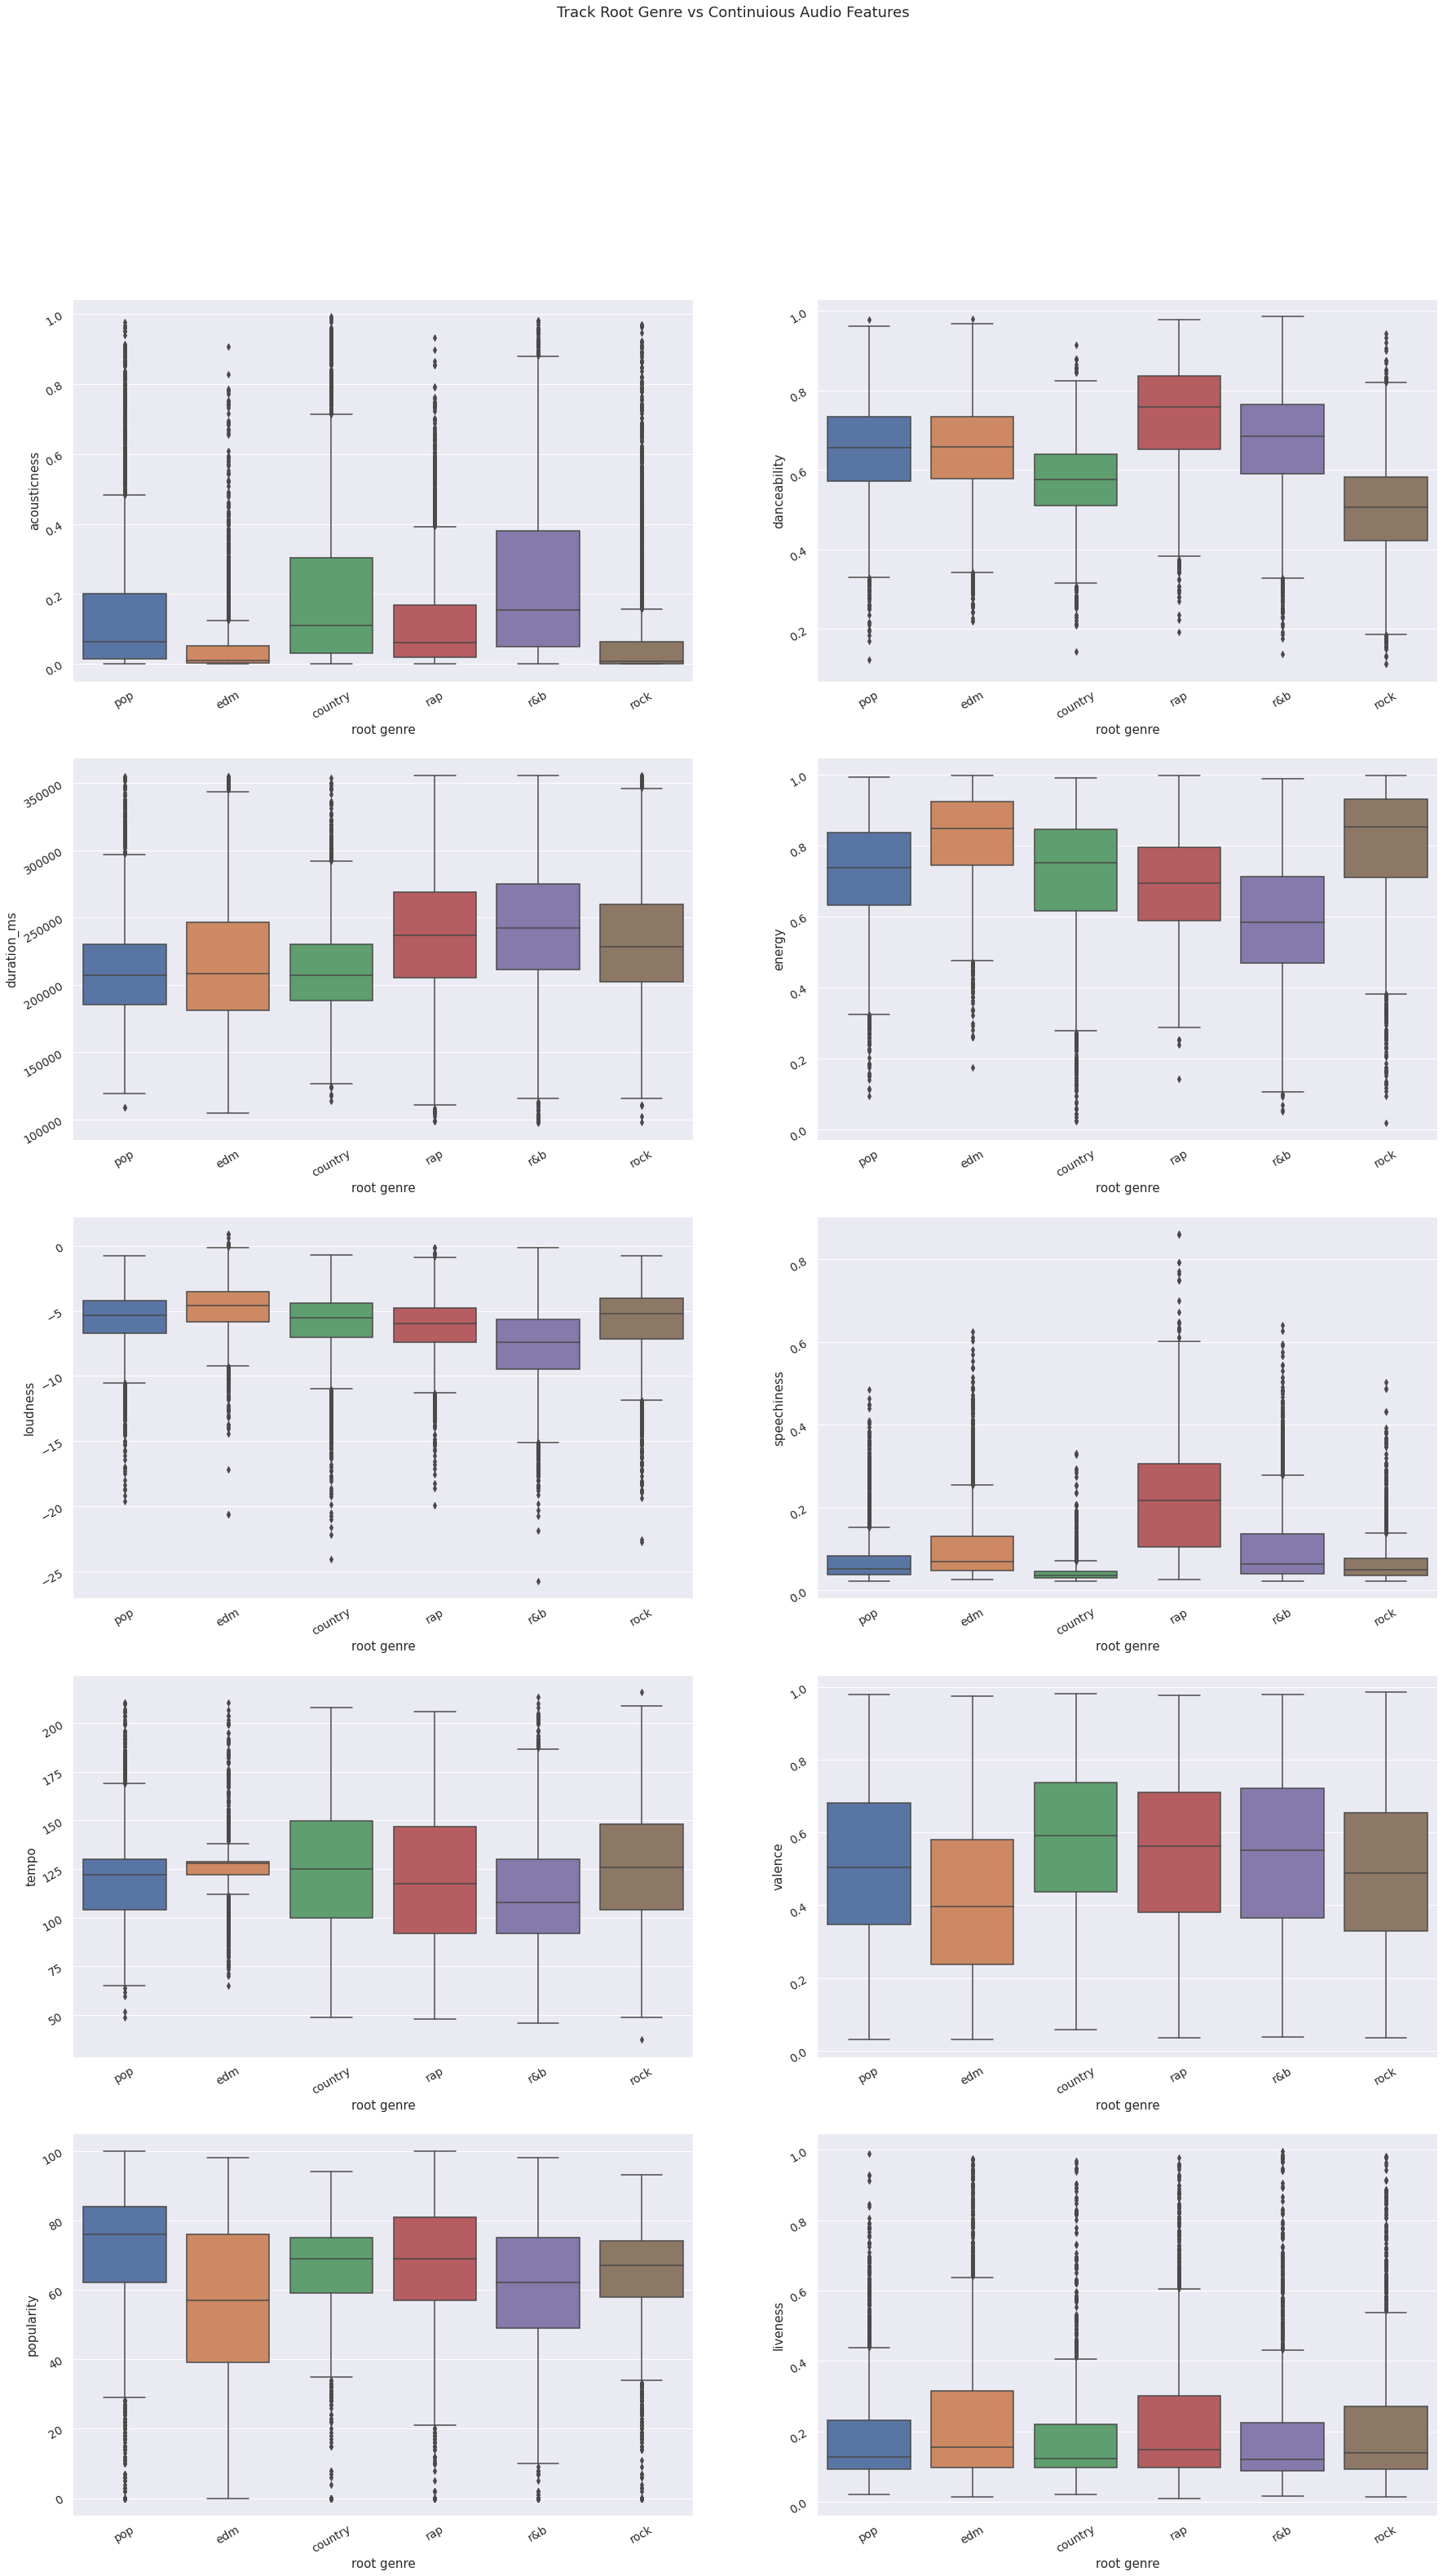

In [25]:
#How the Audio Features differ among the differnt root genres
fig, axes = plt.subplots(5,2,figsize=(30, 50))
fig.suptitle("Track Root Genre vs Continuious Audio Features")

sns.set(font_scale = 1.25)
#acousticness
plt1 = sns.boxplot(ax = axes[0,0],data = spotify_df, x = "root genre", y = 'acousticness')

#danceability
plt2 = sns.boxplot(ax = axes[0,1],data = spotify_df, x = "root genre", y = 'danceability')

#duration_ms
plt3 = sns.boxplot(ax = axes[1,0],data = spotify_df, x = "root genre", y = 'duration_ms')

#energy
plt4 = sns.boxplot(ax = axes[1,1],data = spotify_df, x = "root genre", y = 'energy')

#loudness
plt5 = sns.boxplot(ax = axes[2,0],data = spotify_df, x = "root genre", y = 'loudness')

#speechiness
plt6 = sns.boxplot(ax = axes[2,1],data = spotify_df, x = "root genre", y = 'speechiness')

#tempo
plt7 = sns.boxplot(ax = axes[3,0],data = spotify_df, x = "root genre", y = 'tempo')

#valence
plt8 = sns.boxplot(ax = axes[3,1],data = spotify_df, x = "root genre", y = 'valence')

#popularity
plt9 = sns.boxplot(ax = axes[4,0],data = spotify_df, x = "root genre", y = 'popularity')

#liveness
plt10 = sns.boxplot(ax = axes[4,1],data = spotify_df, x = "root genre", y = 'liveness')

for ax in fig.axes:
    ax.tick_params(labelrotation=30)

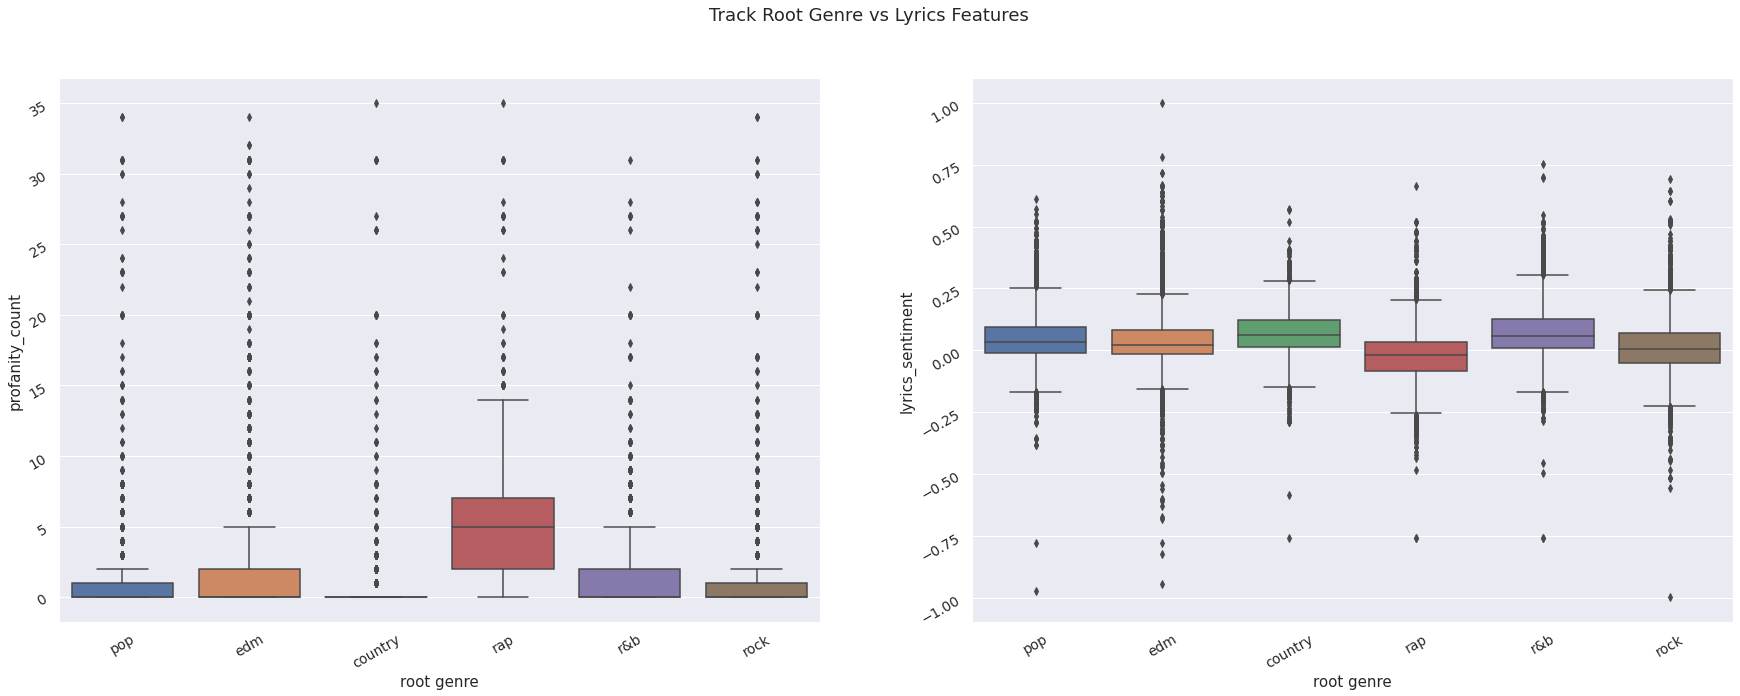

In [23]:
fig, axes = plt.subplots(1,2,figsize=(30, 10))
fig.suptitle("Track Root Genre vs Lyrics Features")
#profanity_count
plt1 = sns.boxplot(ax = axes[0],data = spotify_df, x = "root genre", y = 'profanity_count')
#lyrics_sentiment
plot2 = sns.boxplot(ax = axes[1],data = spotify_df, x = "root genre", y = 'lyrics_sentiment')

for ax in fig.axes:
    ax.tick_params(labelrotation=30)

As we noticed with our pairwise relationship EDA,  Energy and Loudness are highly correlated, and since loudness does not provide as much distinction between genres than energy, it will be dropped for modeling.  Looking at the above boxplots, the following features show the most separation between genres: Danceability, Energy, and Valence. 

# Data Preparation
<a id = "dataprep"></a>

### Selecting our Feature Data 

Using what we learned during EDA, we can select the following audio features to be used in the model building process 
 -  Because Loudness and Energy were highly correlated, and there was minimal variation in loudness across the different genres, it will be dropped.
 - The Part of Speech counts , nouns, verbs, etc, do not have too much interaction with other variables to be droped. 
 - Forigen count was too low across all genres that it was not very useful for classifying, it will not be included. 
 
##### Resulting in a total number of  15 features and on target feature (root genre) 
 

In [56]:
spotify_features_list = ["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","mode","speechiness","tempo","time_signature","valence","popularity",'profanity_count','lyrics_sentiment']
spotify_features_X  = spotify_df[spotify_features_list].values
spotify_targets_y = spotify_df['root genre'].values

### Spliting 

 - In order to evaluate the effectiveness of the models, we will split the data into a training and test set. The Training set is 80% of the tracks, and the test set is the reamining 20% The test set will be used to evaluate the trained models on new data.
 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#set Random seed
seed = 134213243

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(spotify_features_X, spotify_targets_y, test_size = 0.2, random_state =seed, stratify =spotify_targets_y)

### Normalizing 

- To avoid having features with a large range of values introducing bias into the models, we must normalize the data. This will calculate the z score for each feature on a standard normal curve (mean = 0, standard deviation = 1)
"

In [72]:
#scalling the data
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

# Modeling 
<a id = "modeling"></a>

### Logistic Regression 
<a id ="lm"></a>

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state= seed, solver = 'lbfgs')
lr.fit(X_train_sc,y_train)

#score
lr.score(X_test_sc, y_test)

0.5879084240942432

Text(0.5, 1.0, 'LogisticRegression Confusion Matrix')

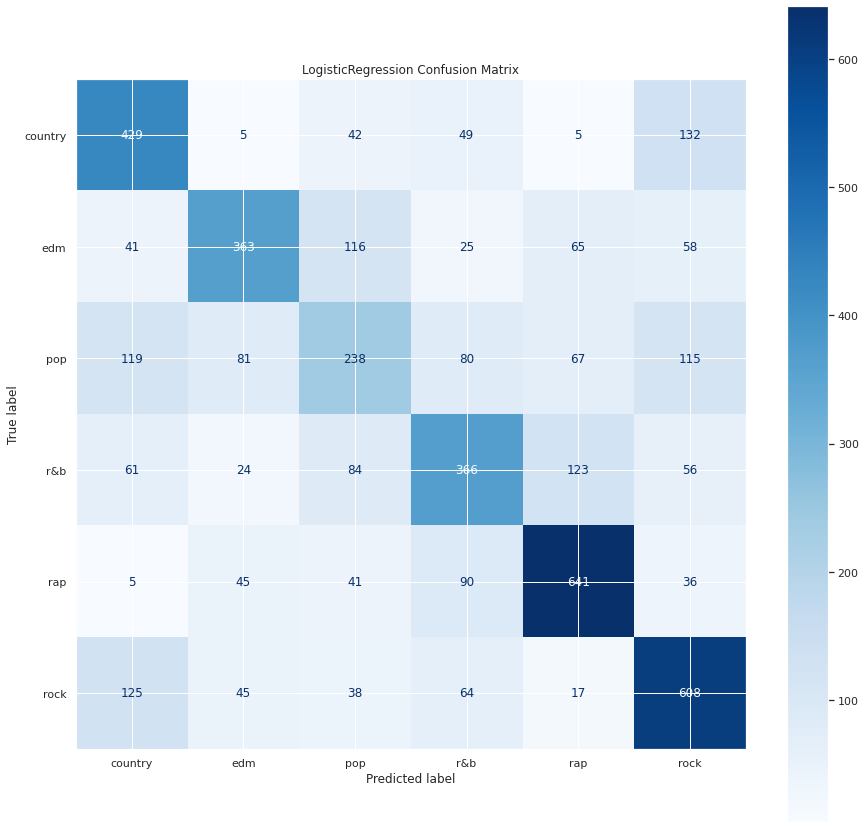

In [80]:
from sklearn.metrics import plot_confusion_matrix
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(lr, X_test_sc, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title("LogisticRegression Confusion Matrix")

In [81]:
from sklearn.model_selection import cross_validate
#cross validate with 5 folds, returning estimators 
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_sc,
                             y = y_train,
                             cv = 5, 
                             n_jobs=-1,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [82]:
cv_fivefold['test_score']

array([0.59544318, 0.58627396, 0.57460406, 0.57488191, 0.58337966])

In [83]:
validation_mean_logreg = cv_fivefold['test_score'].mean()

validation_std_logreg = cv_fivefold['test_score'].std()
print('Standard Logistic Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean_logreg, validation_std_logreg))

Standard Logistic Regression 5-fold cv results (Accuracy) 0.583 =/- 0.008


#### Key Observations 

 - A naive logistic regression model has an accuracy of 58%. This is a good baseline for models going forward as our model is slightly better at predicting genre thean random . 


### Decision Tree
<a id="tree"></a>
- Seting max depth to 5 for a baseline 

In [88]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state=seed )
dec_tree.fit(X_train_sc,y_train)
dec_tree.score(X_test_sc, y_test)

0.5190042231607024

Text(0.5, 1.0, 'Decision Trees Confusion Matrix')

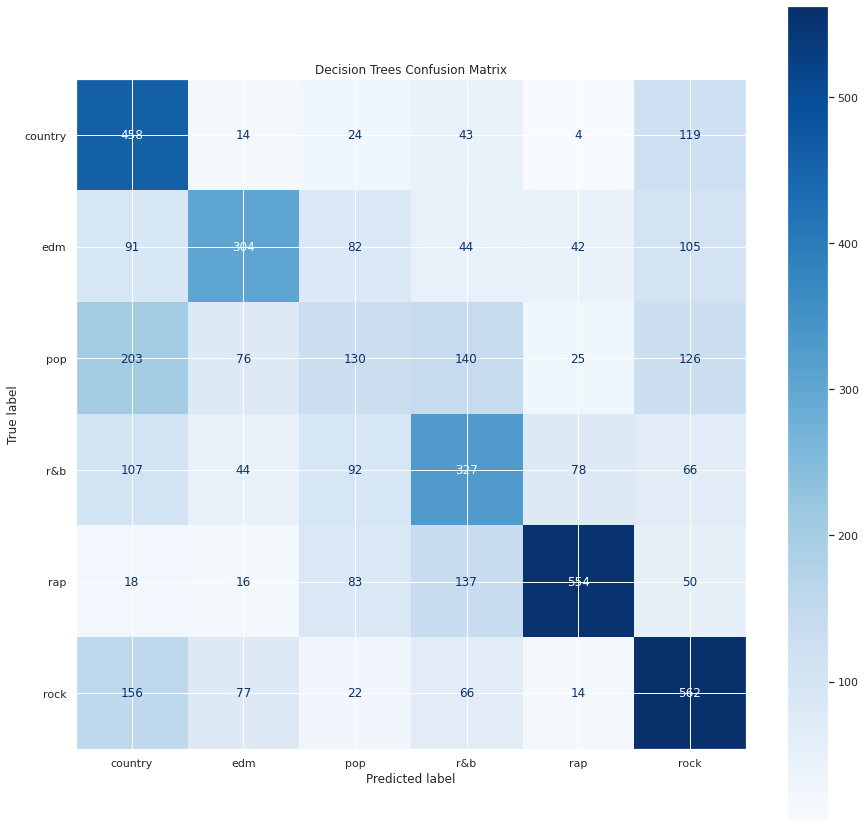

In [89]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(dec_tree, X_test_sc, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title("Decision Trees Confusion Matrix")

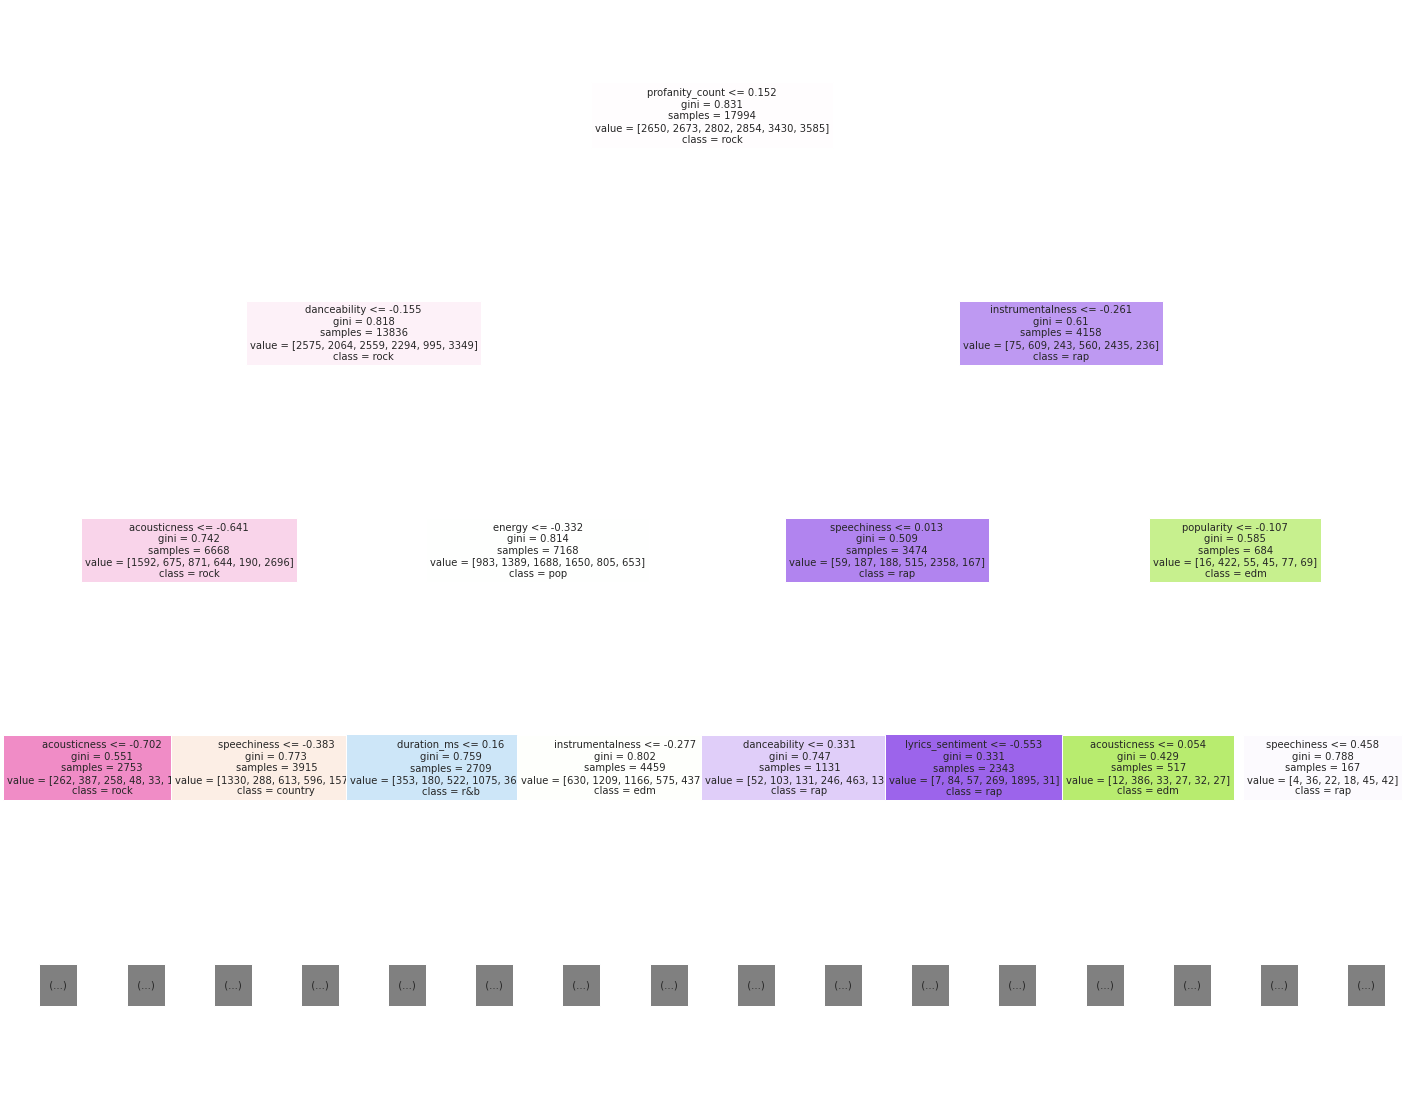

In [96]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dec_tree, max_depth=3, fontsize=10,feature_names=spotify_features_list,  
                   class_names=['country','edm','pop','r&b','rap','rock'],
                   filled=True)

plt.show()

In [133]:
#cross validate with 5 folds, returning estimators 
cv_fivefold = cross_validate(estimator= dec_tree, 
                             X = X_train_sc,
                             y = y_train,
                             cv = 5, 
                             n_jobs=-1,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [134]:
cv_fivefold['test_score']

array([0.52875799, 0.5070853 , 0.5126424 , 0.51153098, 0.5172318 ])

In [135]:
validation_mean_dt = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()
print('Decsison Trees  5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean_dt, validation_std))

Decsison Trees  5-fold cv results (Accuracy) 0.515 =/- 0.007


### Random Forests
<a id="rndfor"></a>

In [109]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(criterion = 'gini', n_estimators= 100, max_features='auto')
rand_forest.fit(X_train_sc, y_train)
rand_forest.score(X_test_sc, y_test)

0.6879306512558346

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

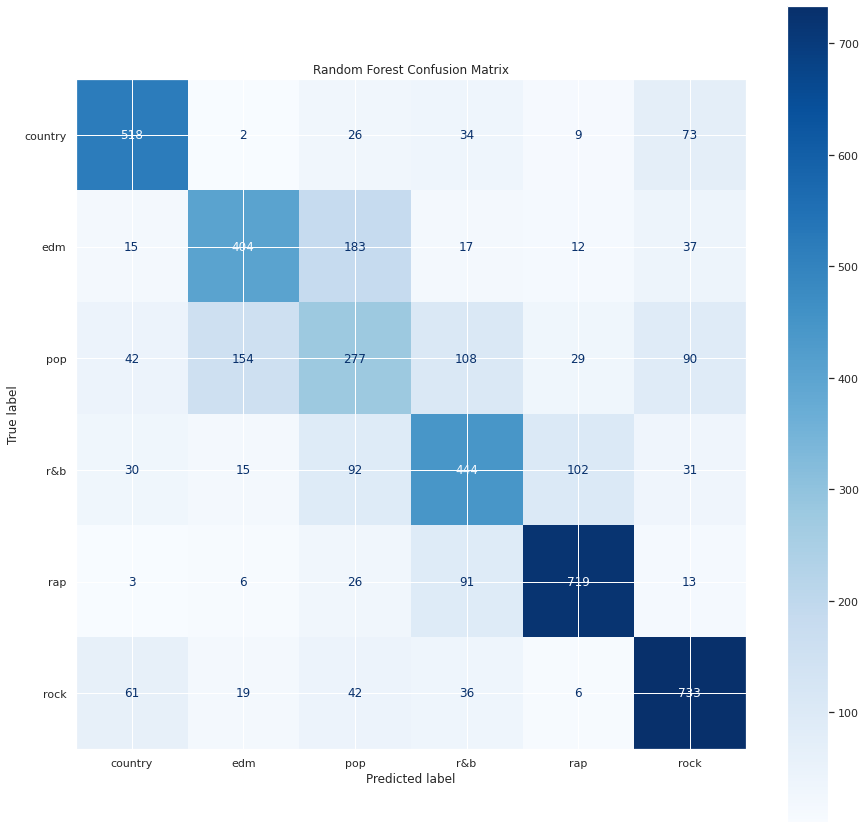

In [110]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(rand_forest, X_test_sc, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title("Random Forest Confusion Matrix")

In [129]:
#cross validate with 5 folds, returning estimators 
cv_fivefold = cross_validate(estimator= rand_forest, 
                             X = X_train_sc,
                             y = y_train,
                             cv = 5,
                             n_jobs= -1, 
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


In [130]:
cv_fivefold['test_score']

array([0.68102251, 0.67852181, 0.67324257, 0.67518755, 0.68788216])

In [131]:
validation_mean_rnd_forest = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()
print('Random Forest  5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean_rnd_forest, validation_std))

Random Forest  5-fold cv results (Accuracy) 0.679 =/- 0.005


#### Feature Importance 

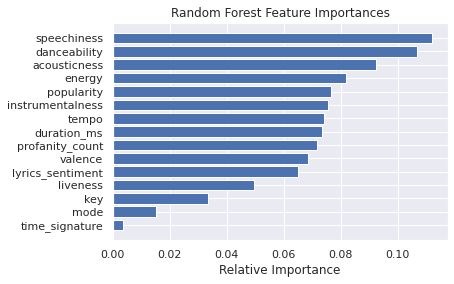

In [111]:
importances = rand_forest.feature_importances_
indices = np.argsort(importances)

plt.title("Random Forest Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [spotify_features_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Key observation
 - Categorical data like key mode and time signature are not very useful at all. 
 - Our lyrics features do have some value to the model 
 


### Compairing Models 

During the initial modeling phase we found that a random forest model had the greatest initial accuracy with 67%. We will be progressing on to fine-tuning using this approach.

In [137]:
models = { 'Logistic Regression' : [validation_mean_logreg],
           'Decision Tree' : [validation_mean_dt],
          'Random Forest' : [validation_mean_rnd_forest]}
modle_acc = pd.DataFrame(models)
modle_acc

,Logistic Regression,Decision Tree,Random Forest
0,0.582917,0.51545,0.679171


With 6 possible root genres, guessing at a genre randomly would be 17% accurate (1 in 6). So, all of our posible models are better than guessing at random. Thus answering our question: Yes! It is possible to build a genre classifier from audio features and lyric data. 

# Fine-Tuning 
<a id = "finetune"></a>

To tune our final model we will be using a Grid Search approach, where we will search over all possible hyperparameters, and then return the combination of the best parameters for the model. 

In [123]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,15,20],
    'criterion' :['gini', 'entropy']
}

rand_forest = RandomForestClassifier(random_state=seed)

rand_forest_grid = GridSearchCV(estimator= rand_forest, param_grid = param_grid, scoring = 'accuracy',cv = 5, refit=True,n_jobs = -1)

rand_forest_grid.fit(X_train_sc,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=134213243),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000]},
             scoring='accuracy')

What are the most optimal hyperparameters? 

In [124]:
#extract the best Params 
rand_forest_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 1000}

In [125]:
final_model = RandomForestClassifier(random_state=seed, max_features='auto', max_depth=20, n_estimators = 1000, criterion='entropy')
final_model.fit(X_train_sc,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000,
                       random_state=134213243)

In [126]:
final_model.score(X_test_sc, y_test)

0.6965992442765059

# Final Model & Conclusion 
<a id = "final"></a>

Our Final model is a Random Forest Classifier with the following parameters:  number of estimators: 1000,  max_features : ‘auto’ , max_depth: 20, and criterion: ‘entropy.  It had a final accuracy of 0.6965 or ~70% at predicting the genre of a Spotify track. 

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

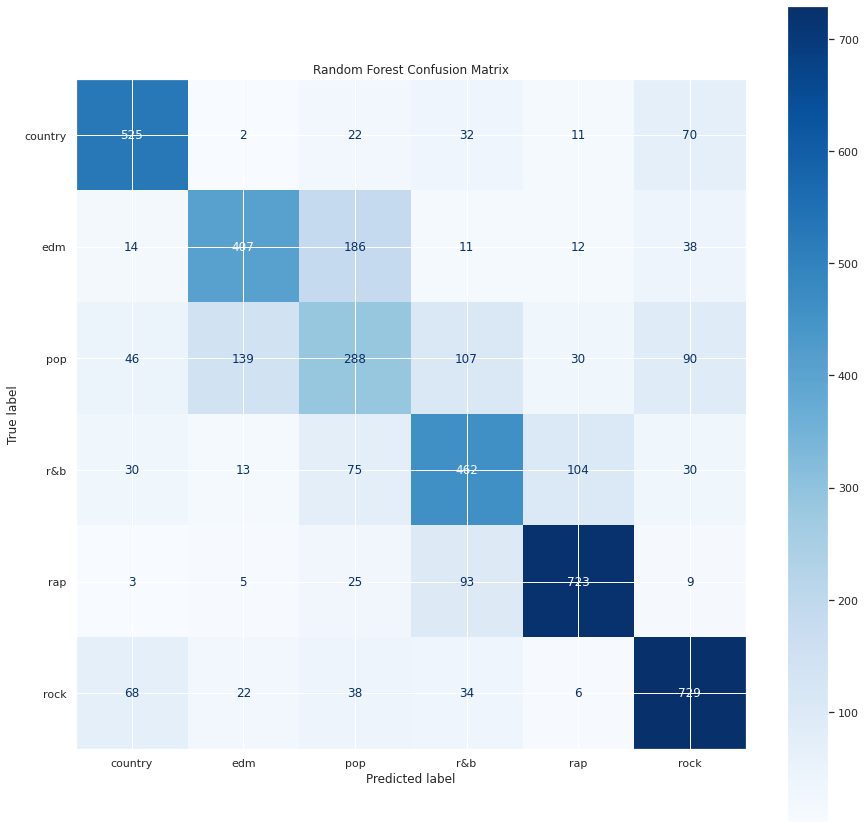

In [127]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(final_model, X_test_sc, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title("Random Forest Confusion Matrix")

### Feature Importance 

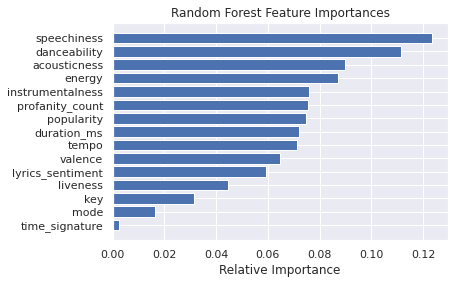

In [128]:
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.title("Random Forest Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [spotify_features_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Our classification model helps us answer our original question:  what features define a genre.  Speechiness is the most important genre distention, followed by danceability and acousticness.  County was easy to classify because of its strong acousticness and low energy. Rap was also easy to classify due to its high speachiness and high profainity_count. Pop and EDM were the two most confused genres as there is a large amount of crossover in characteristics between genres, but EDM has a slightly higher tempo and word count.  The next most miss-classifications was between Rap and R&B as there is also a large cross over between genres. 

Did our incorporation of features from Genius API lyrics analysis help improve our understanding of genre? Yes: as during the modeling process,  our calculated profanity count and our basic sentiment analysis of lyrics did contribute to the final model than some default spotify audio features. 

Comparing my final model to other similar genre classifiers I have come across in my research for this project, my results are to be expected.  Genre is an inherently messy topic that is hard to define even with unlimited data, time, and resources.  Every day there are new sub-genres being created, and new songs that bend and twist multiple genres into one.  Sometimes it is just  hard to keep up with it how fast music trends come and go.  

# Limitations & Future Work
<a id = "futurework"></a>

The first and most easily implemented improvement would be to expand the scope of scoring and ranking the different models, looking beyond just a simple training-test accuracy score. I would also look into more models such as SVM or adding regularization to logistic regression. 

I kept running into RAM and CPU bottlenecks while building features and training models.  Grid Search is an inceidlb resource intensive process, as it brute forces its way to a good solution. I would research other methods to use, especially when dealing with large text volumes like all the lyrics. (Final dataframe was 1.6 GB in size!) 

One of the biggest challenges with this project is that ,in its current implementation, there is no way to verify that the results pulled from the Genius API search function are the actual truye lyrics for any given song. While exploring the data I grabbed tracks at random and looked at the lyrics and most appeared correct to me, but every once in a while I would get back a large text string or seemingly random text. Some errors like this are to be expected with a crowdsourced service like Genius, but it might be worth looking into finding a verified data source where I can 100% count on the validity of lyrics matching the song. 

With all the lyrics I gathered from this project, an interesting future project would be to use a markov chain model to generate new lyrics based on a genre seed. 


# References
<a id = "ref"></a>

 - Python Machine Learning (Third Edition) By Sebastian Raschka & Vahid Mirjalili
 - [Mapping Song Lyric Locations in Python By Ashley Gingeleski](https://ashleygingeleski.com/tag/song-lyrics/)
 - [49 Years of Lyrics: A Python based study of the change in language for popular music from 1970 to 2018.](https://towardsdatascience.com/49-years-of-lyrics-why-so-angry-1adf0a3fa2b4)
 - [ShoegazeBot](https://github.com/ferdavid1/ShoegazeBot)]
 - [Understanding + classifying genres](https://www.kaylinpavlik.com/classifying-songs-genres/)
 - [Multiprocessing for heavy API requests with Python and the PokéAPI](https://hackernoon.com/multiprocessing-for-heavy-api-requests-with-python-and-the-pokeapi-3u4h3ypn)